# Ejercicio de programación Regresión Lineal

In [68]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

## 1 Regresión lineal con una variable

El archivo `Data/ex1data1.txt` contiene el dataset para el problema de regresion lineal. La primera columna es la problacion de una ciudad (en 10,000s) y la segunda columna es el beneficio que genera un camion de comida en esa ciudad (en $10,000s). Un valor negativo indica una perdida. 

In [69]:
# Leer datos separados por una coma
data = np.loadtxt(os.path.join('Datasets', 'capacidad_adquisitiva.txt'), delimiter=',')
X, y = data[:, :1], data[:, 1]

m = y.size  # m = numero de ejemplos de entrenamiento
for i in range(10):
    print('{:8.0f}{:10.0f}'.format(X[i, 0], y[i]))

       3         1
       4         2
       7         3
      15         5
      17        10
      20        50
      25       500
      27       800
      30      6000
      33      8000


### 1.1 Trazar los datos

In [70]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva. 
    
    fig = pyplot.figure()  # abre una nueva figura
    
    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Beneficio en $10,000')
    pyplot.xlabel('Poblacion de una ciudad en 10,000s')


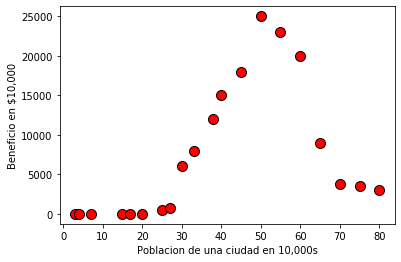

In [71]:
plotData(X, y)

In [72]:
X = np.concatenate([X, X*X],axis=1)
print(X)

[[3.000e+00 9.000e+00]
 [4.000e+00 1.600e+01]
 [7.000e+00 4.900e+01]
 [1.500e+01 2.250e+02]
 [1.700e+01 2.890e+02]
 [2.000e+01 4.000e+02]
 [2.500e+01 6.250e+02]
 [2.700e+01 7.290e+02]
 [3.000e+01 9.000e+02]
 [3.300e+01 1.089e+03]
 [3.800e+01 1.444e+03]
 [4.000e+01 1.600e+03]
 [4.500e+01 2.025e+03]
 [5.000e+01 2.500e+03]
 [5.500e+01 3.025e+03]
 [6.000e+01 3.600e+03]
 [6.500e+01 4.225e+03]
 [7.000e+01 4.900e+03]
 [7.500e+01 5.625e+03]
 [8.000e+01 6.400e+03]]


# <a id="section2"></a>
### 1.2 Descenso por el gradiente

#### 1.2.1 Ecuaciones de actualización

El objetivo de la regresion lineal es minimizar la funcion de costo

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

donde la hipotesis $h_\theta(x)$ esta dada por el modelo lineal
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Los parametros del modelo son los valores $\theta_j$. Estos son los valores que se ajustaran al costo minimo $J(\theta)$. Un camino para lograr esto es usar el algoritmo por lotes del descenso por el gradiente. En el descenso por el gradiente por lotes, cada iteracion ejecuta una actualizacion 
$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{actualizacion simultanea } \theta_j \text{ for all } j$$

Con cada paso del descenso por el gradiente, los parametros $\theta_j$ son mas cercanos a los valores optimos que permitiran lograr el costo mas bajo J($\theta$).

#### 1.2.2 Implementación

In [73]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

In [74]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

#print(X)
#print('Media calculada:', mu)
#print('Desviación estandar calculada:', sigma)
#print(X_norm)

In [75]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
#X_norm = np.concatenate([X_norm, X_norm * X_norm], axis=1)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
print(X)

[[ 1.00000000e+00 -1.49909249e+00 -1.01251109e+00]
 [ 1.00000000e+00 -1.45620000e+00 -1.00892198e+00]
 [ 1.00000000e+00 -1.32752253e+00 -9.92001936e-01]
 [ 1.00000000e+00 -9.84382623e-01 -9.01761677e-01]
 [ 1.00000000e+00 -8.98597645e-01 -8.68947037e-01]
 [ 1.00000000e+00 -7.69920178e-01 -8.12034147e-01]
 [ 1.00000000e+00 -5.55457733e-01 -6.96670180e-01]
 [ 1.00000000e+00 -4.69672755e-01 -6.43346390e-01]
 [ 1.00000000e+00 -3.40995288e-01 -5.55669775e-01]
 [ 1.00000000e+00 -2.12317821e-01 -4.58764043e-01]
 [ 1.00000000e+00  2.14462445e-03 -2.76745339e-01]
 [ 1.00000000e+00  8.79296025e-02 -1.96759655e-01]
 [ 1.00000000e+00  3.02392048e-01  2.11500607e-02]
 [ 1.00000000e+00  5.16854493e-01  2.64696214e-01]
 [ 1.00000000e+00  7.31316938e-01  5.33878804e-01]
 [ 1.00000000e+00  9.45779383e-01  8.28697831e-01]
 [ 1.00000000e+00  1.16024183e+00  1.14915330e+00]
 [ 1.00000000e+00  1.37470427e+00  1.49524520e+00]
 [ 1.00000000e+00  1.58916672e+00  1.86697354e+00]
 [ 1.00000000e+00  1.80362916e+

<a id="section2"></a>
#### 1.2.3 Cálculo del costo $J(\theta)$

In [76]:
def computeCost(X, y, theta):
    # inicializa algunos valores importantes
    m = y.size  # numero de ejemplos de entrenamiento
   
    J = 0
    h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

Ejemplo de funcionamiento de la funcion computeCoste con dos valores diferentes de $\theta$. 

<a id="section3"></a>
#### 1.2.4 Descenso por el gradiente

El costo $J(\theta)$ esta parametrizado por el vector $\theta$, no $X$ y $y$. Donde hay que minimizar el valor de $J(\theta)$ cambiando los valores del vector $\theta$. Una buena manera de verificar si el descenso por el gradiente esta trabajando correctamente es ver los valores de $J(\theta)$ y verificar si estos decresen en cada paso. 

<div class="alert alert-box alert-warning">
**Vectores y matrices en `numpy`** - Importantes notas para implementación
Un vector en `numpy` es un array de una diemension, por ejemplo `np.array([1, 2, 3])` es un vector. Una matriz en `numpy` is un arreglo de dos dimensiones, por ejemplo  `np.array([[1, 2, 3], [4, 5, 6]])`. Sin embargo, lo siguiente todavía se considera una matriz `np.array ([[1, 2, 3]])` ya que tiene dos dimensiones, incluso si tiene una forma de 1x3 (que parece un vector).

In [77]:
def gradientDescent(X, y, theta, alpha, num_iters):
        # Inicializa algunos valores importantes
    m = y.shape[0]  # numero de ejemplos de entrenamiento
    
    # hace una copia de theta, para evitar cambiar la matriz original, 
    # ya que las matrices numpy se pasan por referencia a las funciones

    theta = theta.copy()
    
    J_history = [] # Lista que se utiliza para almacenar el costo en cada iteración
    
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        # save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))
    
    return theta, J_history

Se inicializan los parametros $\theta$ con 0 y la taza de aprendizaje $\alpha$ con 0.01.

theta calculado por el descenso por el gradiente: [  7383.55        20386.20160503 -17114.27964992]
El precio predecido para una casa de 1650 sq-ft y 3 dormitorios (usando el descenso por el gradiente): $1434365


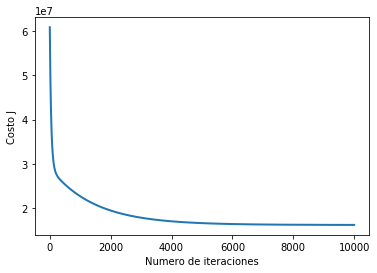

In [78]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.01
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(3)
theta, J_history = gradientDescent(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio para una casa de 1650 sq-ft, con 3 dormitorios
X_array = [1, 1650, 3]
X_array[1:3] = (X_array[1:3] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El precio predecido para una casa de 1650 sq-ft y 3 dormitorios (usando el descenso por el gradiente): ${:.0f}'.format(price))

Se utilizan los parametros finales para grafical la linea.

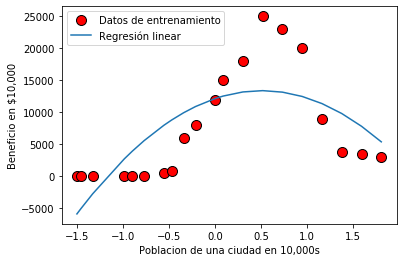

In [79]:
# grafica la linea de ajuste
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'Regresión linear']);

Los valores finales de $\theta$ se utilizaran para realizar predicciones.

In [80]:
X_array = [1, 23, 529]
X_array[1:3] = (X_array[1:3] - mu) / sigma

In [81]:
X_array[1:3]
print(np.dot(X_array, theta))

7076.453476337313


In [82]:
# Cargar datos
data = np.loadtxt(os.path.join('Datasets', 'capacidad_adquisitiva.csv'), delimiter=";",skiprows=1)
X = data[:, :1]
y = data[:, 1]
m = y.size
X_original = X.copy()
X = np.concatenate([X, X * X], axis=1)
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [83]:
def normalEqn(X, y):
  
    theta = np.zeros(X.shape[1])
    
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    
    return theta

In [84]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el precio para una casa de superficie de 1650 sq-ft y tres dormitorios

X_array = [1, 20, 400]
price = np.dot(X_array, theta) 

print('Precio predecido para una cada de superficie de 1650 sq-ft y 3 dormitorios (usando la ecuación de la normal): ${:.0f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [-8774.07355411   901.17335701    -9.09484831]
Precio predecido para una cada de superficie de 1650 sq-ft y 3 dormitorios (usando la ecuación de la normal): $5611


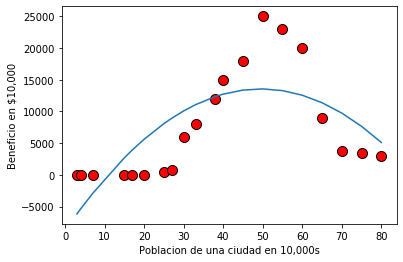

In [85]:
plotData(X[:, 1], y)
#X = np.concatenate([np.ones((m, 1)), X], axis=1)
#X = np.concatenate([X, X * X], axis=1)

pyplot.plot(X[:, 1], np.dot(X, theta), '-')